In [398]:
# Notebook setup
import numpy as np                          # a scientific computing library
from matplotlib import pyplot as plt        # a plotting library
from mpl_toolkits.mplot3d import axes3d     # necessary for generating 3D plots
from ipywidgets import *
from IPython.display import display
plt.rcParams['axes.labelsize'] = 14         # set default plot axes label font size
plt.rcParams['axes.titlesize'] = 20         # set default plot title font size
plt.rcParams['legend.fontsize'] = 18        # set default plot legend font size
# make plots inline in the notebook instead of creating a new window
%matplotlib inline

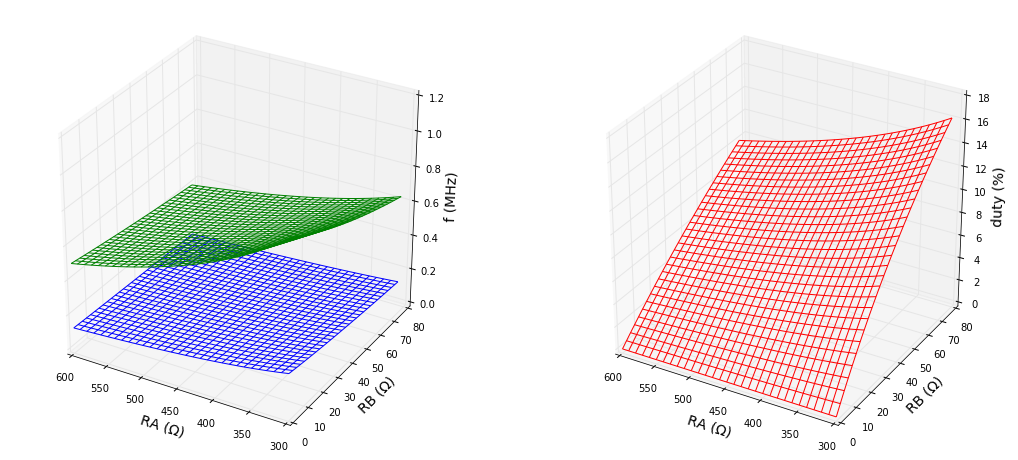

In [413]:
class ST_TS555(object): 
    def __init__(self):
        self.RAu=1e3
        self.RAl=470
        self.RBuF=8
        self.RBlF=10000
        self.C = 1  # Capacitor; min = 200pF, accurate astable freq. to 5% at 0.1uF
        self.Cmax = 0
        self.Cmin = 0
        self.CmaxF = 1.4397e-6
        self.CminF = 1.152e-5
        self.density = 300
        self.flag = False
        self.a = widgets.FloatText(value=self.Cmax, description='Cap Max:', width=500)
        self.b = widgets.FloatText(value=self.Cmin, description='Cap Min:', width=500)
        self.c = widgets.FloatText(value=(self.RAl + self.RAu)/2, description='RA:', width=500)
        self.d = widgets.FloatText(value=(self.RAl/self.RBlF + self.RAu/self.RBuF)/2, description='RB:', width=500)
        display(self.a)
        display(self.b)
        display(self.c)
        display(self.d)
                
    def recalc(self):
        self.RA = np.linspace(self.RAl, self.RAu, self.density)  # Resistor A; min = 470Ω, accurate astable freq. to 5% at 1kΩ-100kΩ
        self.RB = np.linspace(self.RAl/self.RBlF, self.RAu/self.RBuF, self.density)  # Resistor B; min = 200Ω, accurate astable freq. to 5% at 1kΩ-100kΩ
        self.RA_m, self.RB_m = np.meshgrid(self.RA, self.RB)
        self.Cmax = self.CmaxF*self.C/self.RAl
        self.Cmin = self.CminF*self.C/self.RAu
        self.fmax = (1.44 / ((self.RA_m + 2*self.RB_m) * self.Cmax))  # frequency
        self.fmin = (1.44 / ((self.RA_m + 2*self.RB_m) * self.Cmin))  # frequency
        self.D = self.RB_m/(self.RA_m + 2*self.RB_m) * 100  # duty cycle        

    def replot(self):
        self.recalc()
        self.fig = plt.figure(figsize=(18, 8))
        self.ax1 = self.fig.add_subplot('121', projection='3d')
        self.ax1.invert_xaxis()
        self.ax1.set_xlabel('RA (Ω)')
        self.ax1.set_ylabel('RB (Ω)')
        self.ax1.set_zlabel('f (MHz)')        
        self.ax1.plot_wireframe(self.RA_m, self.RB_m, self.fmax/1000000, rstride=10, cstride=10, color='g')
        self.ax1.plot_wireframe(self.RA_m, self.RB_m, self.fmin/1000000, rstride=10, cstride=10, color='b')
        self.ax2 = self.fig.add_subplot('122', projection='3d')
        self.ax2.invert_xaxis()
        self.ax2.set_xlabel('RA (Ω)')
        self.ax2.set_ylabel('RB (Ω)')
        self.ax2.set_zlabel('duty (%)')
        self.ax2.plot_wireframe(self.RA_m, self.RB_m, self.D, rstride=10, cstride=10, color='r')
        self.a.value = self.Cmax
        self.b.value = self.Cmin
        self.c.value = (self.RAl + self.RAu)/2
        self.d.value = (self.RAl/self.RBlF + self.RAu/self.RBuF)/2
    
    def updateRAu(self, RA_upper):
        self.RAu = RA_upper
        if self.flag: self.replot()
    
    def updateRAl(self, RA_lower):
        self.RAl = RA_lower
        if self.flag: self.replot()
            
    def updateCap(self, Cap):
        self.C = Cap
        if self.flag: self.replot()
    
if __name__ == '__main__':
    chip = ST_TS555()
    interact(chip.updateRAu, RA_upper=FloatSlider(min=1e2, max=1e4, step=50, value=600, description='RA_upper'))
    interact(chip.updateRAl, RA_lower=FloatSlider(min=0.1e2, max=5e3, step=50, value=300, description='RA_lower'))
    interact(chip.updateCap, Cap=FloatSlider(min=1e-1, max=0.5e1, step=1e-1, value=1, description='Cap scaler'))
    
    chip.flag = True
    chip.replot()    